# Python for Data Scientist
## From data manipulation to machine learning

# Pandas


Libreria per l'analisi e la manipolazione di dati

### Numpy
Array di dati omogenei

## pandas
tabelle o dati eterogenei


In [1]:
import numpy as np
import pandas as pd

In [2]:
data = np.random.randint(10, size=(6, 4))
data

array([[3, 8, 9, 8],
       [5, 1, 1, 0],
       [4, 5, 6, 6],
       [2, 0, 8, 3],
       [1, 5, 6, 6],
       [1, 7, 4, 3]])

In [3]:
pd.DataFrame(data)

,0,1,2,3
0,3,8,9,8
1,5,1,1,0
2,4,5,6,6
3,2,0,8,3
4,1,5,6,6
5,1,7,4,3


Pandas permette di incapsulare dati e di manipolarli in maniera efficiente*

dati che vanno dai 100 MB a 1 GB

In [4]:
column_names = ("aa", "bb", "cc", "dd")
pd.DataFrame(data, columns=column_names)

,aa,bb,cc,dd
0,3,8,9,8
1,5,1,1,0
2,4,5,6,6
3,2,0,8,3
4,1,5,6,6
5,1,7,4,3


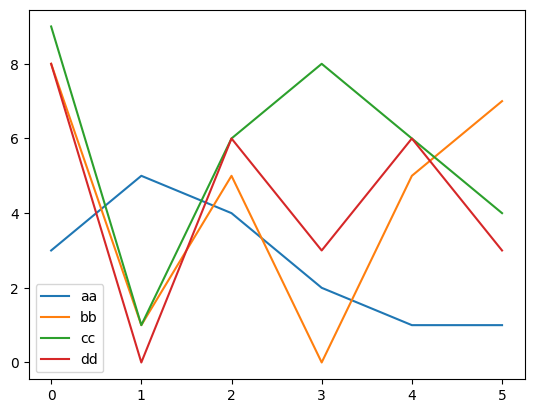

In [5]:
pd.DataFrame(data, columns=column_names).plot();

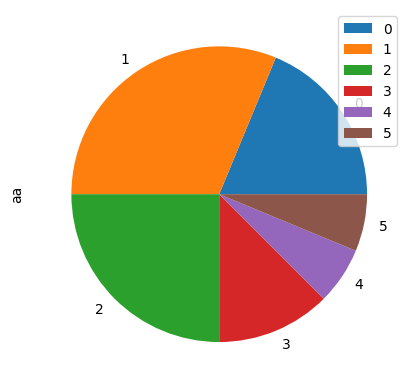

In [6]:
pd.DataFrame(data, columns=column_names).plot.pie(y="aa");

# Series
## pandas structures

le Series di pandas rappresentano un sequenza di dati omogenei (colonna)

In [7]:
from pandas import Series

In [8]:
pd.Series([4, 5, 1, 2, 3, 34], index=[0, 1, 3, 5, 6, 7])

0     4
1     5
3     1
5     2
6     3
7    34
dtype: int64

In [9]:
data = [3, 4, 6, 1, 1]
indices = ["a", "b", "c", "d", "e"]
Series(data, indices)

a    3
b    4
c    6
d    1
e    1
dtype: int64

In [10]:
s = Series(data, indices)
s
# s[['a', 'c']]
# s[s > 3]
# s[s == 10]

a    3
b    4
c    6
d    1
e    1
dtype: int64

In [11]:
s = Series(data, indices)

s * 2
# s ** 2
# np.exp(s)

a     6
b     8
c    12
d     2
e     2
dtype: int64

Posso costruire serie da dizionari, array, etc etc

In [12]:
s = Series({"windows": 10, "linux": 8, "mac": 3})
s

windows    10
linux       8
mac         3
dtype: int64

In [13]:
s = Series({"windows": 10, "linux": 8, "mac": None})
s[~s.isnull()]

windows    10.0
linux       8.0
dtype: float64

# Dataframe
## pandas structures

Rappresenta una tabella di colonne omogenee come tipo

Sequenza di serie pandas che condividono gli indici

In [14]:
from pandas import DataFrame

In [15]:
data = {
    "name": ["Bruce", "Clark", "Berry"],
    "surname": ["Wayne", "Kent", "Allen"],
    "alterego": ["Batman", "Superman", "Flash"],
    "esordio": [1939, 1933, 1940],
    "film": [9, 8, 0]
}
df = DataFrame(data)
df

,name,surname,alterego,esordio,film
0,Bruce,Wayne,Batman,1939,9
1,Clark,Kent,Superman,1933,8
2,Berry,Allen,Flash,1940,0


In [16]:
DataFrame(data, columns=["name", "surname"])

,name,surname
0,Bruce,Wayne
1,Clark,Kent
2,Berry,Allen


In [17]:
df.name
df["name"]

0    Bruce
1    Clark
2    Berry
Name: name, dtype: object

In [18]:
df[df.name == "Clark"]

,name,surname,alterego,esordio,film
1,Clark,Kent,Superman,1933,8


### Indicizzazione

funzioni `loc` e `iloc`

In [19]:
df["name"]

0    Bruce
1    Clark
2    Berry
Name: name, dtype: object

In [20]:
df[0]?

Object `df[0]` not found.


In [21]:
df.loc[:1, ["name", "surname"]]
# df
# df.loc[[0, 2], "name":"surname"]

,name,surname
0,Bruce,Wayne
1,Clark,Kent


In [22]:
df.iloc[:2, :2]

,name,surname
0,Bruce,Wayne
1,Clark,Kent


# Operatori matematici

In [23]:
df

,name,surname,alterego,esordio,film
0,Bruce,Wayne,Batman,1939,9
1,Clark,Kent,Superman,1933,8
2,Berry,Allen,Flash,1940,0


In [24]:
df.sum()

name            BruceClarkBerry
surname          WayneKentAllen
alterego    BatmanSupermanFlash
esordio                    5812
film                         17
dtype: object

In [25]:
df2 = DataFrame(np.random.rand(4, 5))
df2
df2.sum()
df2.mean()
df2.count()

0    4
1    4
2    4
3    4
4    4
dtype: int64

In [26]:
df3 = df.copy()
df3.esordio -= 1900
df3["film_norm"] = (df3.film - df3.film.mean()) / df3.film.std()
df3

,name,surname,alterego,esordio,film,film_norm
0,Bruce,Wayne,Batman,39,9,0.675737
1,Clark,Kent,Superman,33,8,0.473016
2,Berry,Allen,Flash,40,0,-1.148754


## Lettura da file

* `read_csv`
* `read_excel`
* `read_json`
* ...

In [27]:
pd.read_csv("example.csv")

,a,b,c,d,e
0,2,1,2,3,4
1,3,3,4,1,5
2,4,3,4,6,7


# Data Analysis

In [28]:
import seaborn as sns

In [29]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [31]:
df.loc[df.species == "setosa", :"petal_width"].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


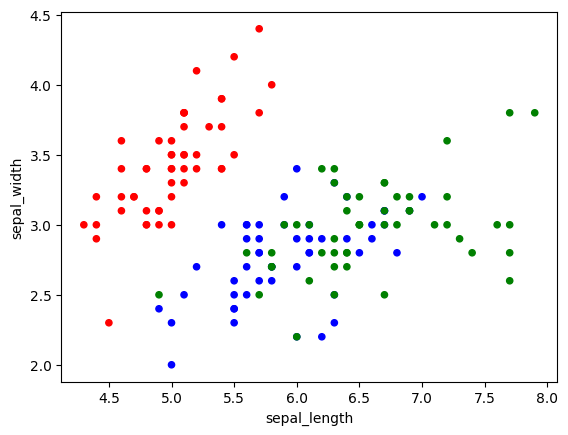

In [32]:
colors = df.species.map({"setosa": "red", "versicolor": "blue", "virginica": "green"})
df.plot.scatter(x="sepal_length", y="sepal_width", c=colors);

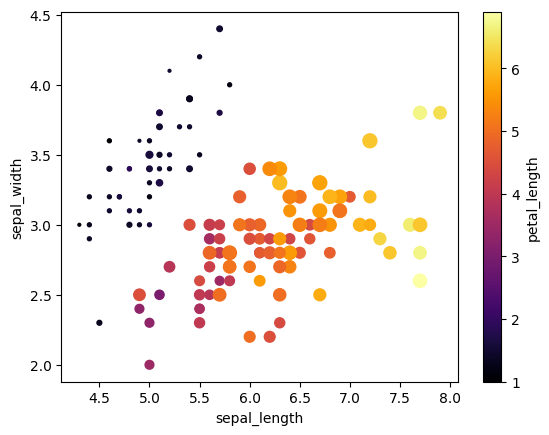

In [33]:
s = df.petal_width * 40
df.plot.scatter(x="sepal_length", y="sepal_width", c="petal_length"
            , s=s, cmap="inferno");